In [245]:
import copy
import math
import random

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


def sphere(x):
    return sum(i ** 2 for i in x)


def rastrigin(x):
    return 10 * len(x) + sum(i ** 2 - 10 * math.cos(2 * math.pi * i) for i in x)


def rosenbrock(x):
    return sum(100 * (x[i + 1] - x[i] ** 2) ** 2 + (1 - x[i]) ** 2 for i in range(len(x) - 1))


def griewank(x):
    ret = 1 + 1 / 4000 * sum(i ** 2 for i in x)
    minus = 1
    for i in range(len(x)):
        minus *= math.cos(x[i] / math.sqrt(i + 1))
    ret -= minus

    return ret


def alpine(x):
    return sum(abs(i * math.sin(i) + 0.1 * i) for i in x)


def two_fact_minima(x):
    return sum(i ** 4 - 16 * i ** 2 + 5 * i for i in x)


def update_x(x, x_rand):
    ret = np.zeros_like(x)
    for i in range(len(ret)):
        ret[i] = x[i] + random.uniform(-1, 1) * x_rand[i]
    return ret


def do_simulate(f, x_min, x_max):
    N = 100
    T = 1000
    X = np.array([[random.uniform(x_min, x_max), random.uniform(x_min, x_max)] for _ in range(N)],
                 dtype="float64")

    C = np.zeros(N, dtype="int")
    score = np.array([f(x) for x in X])
    threshold = 100
    fig = plt.figure(figsize=(25, 4))

    global_best = min(score)
    global_best_x = copy.deepcopy(X[score.argmin()])
    global_bests = [global_best]
    for t in range(T):
        for i in range(N):
            X_temp = update_x(X[i], random.choice(X))
            if f(X_temp) < score[i]:
                score[i] = f(X_temp)
                X[i] = copy.deepcopy(X_temp)
                C[i] = 0
            else:
                C[i] += 1

        i_max = score.argmax()
        X_temp2 = update_x(X[i_max], random.choice(X))
        if f(X_temp2) < score[i_max]:
            score[i_max] = f(X_temp2)
            X[i_max] = copy.deepcopy(X_temp2)
            C[i_max] = 0
        else:
            C[i_max] += 1

        for i in range(N):
            if C[i] > threshold:
                X[i] = [random.uniform(x_min, x_max), random.uniform(x_min, x_max)]

        global_bests.append(min(score))
        if min(score) < global_best:
            global_best = min(score)
            global_best_x = copy.deepcopy(X[score.argmin()])
        if t % int(T / 5) == 0:
            ax = fig.add_subplot(151 + t / int(T / 5), projection='3d')
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(x_min, x_max)
            z = [f(x) for x in X]
            ax.set_zlim(min((min(z), 0)), max((max(z), 1.0)))
            ax.scatter(X[:, 0], X[:, 1], z)

    fig = plt.figure()
    plt.yscale("log")
    global_bests = np.array(global_bests)
    if global_best < 0:
        plt.plot(-global_bests)
    else:
        plt.plot(global_bests)
    print(f'最小値: {global_best}')
    print(f'最小値を取る(x, y): {global_best_x}')

最小値: 2.0689339080644458e-34
最小値を取る(x, y): [-1.38606653e-17  3.84387170e-18]


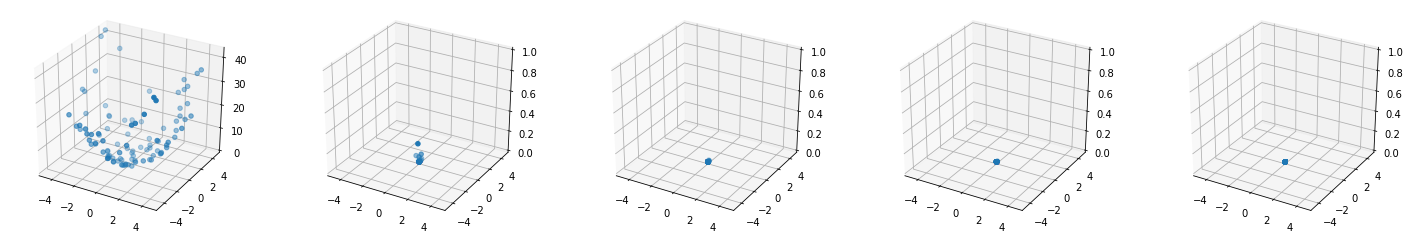

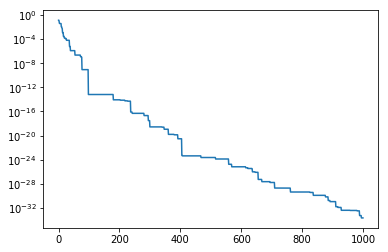

In [246]:
do_simulate(sphere, -5.0, 5.0)

最小値: 0.0
最小値を取る(x, y): [-3.47000171e-10  1.90524521e-09]


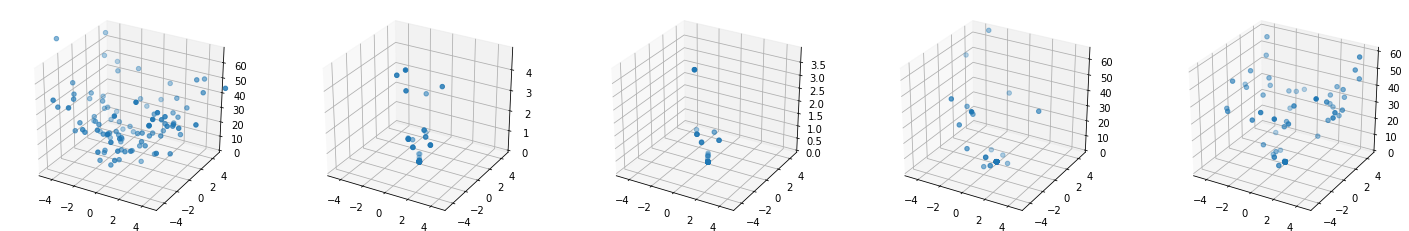

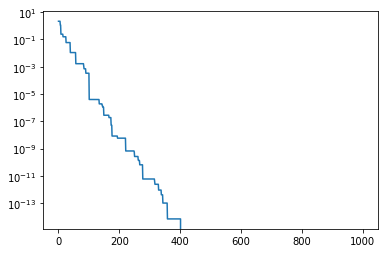

In [247]:
do_simulate(rastrigin, -5.0, 5.0)

最小値: 0.0005231833592552978
最小値を取る(x, y): [0.97950744 0.95841877]


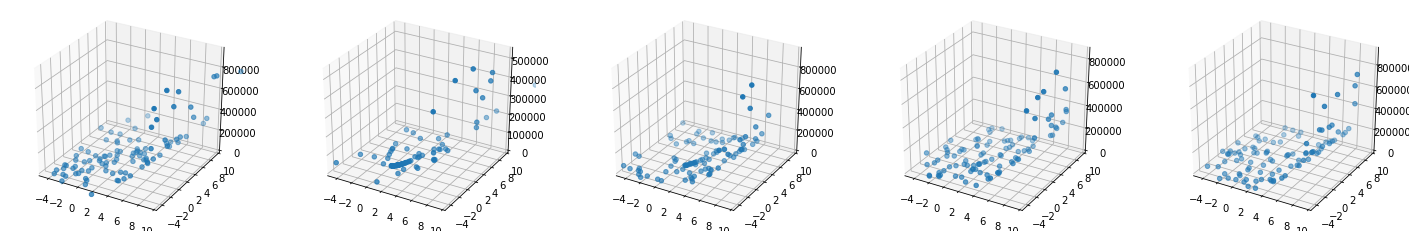

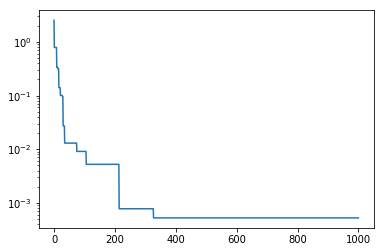

In [248]:
do_simulate(rosenbrock, -5.0, 10.0)

最小値: 0.00012316163434777927
最小値を取る(x, y): [ 0.01567025 -0.00113852]


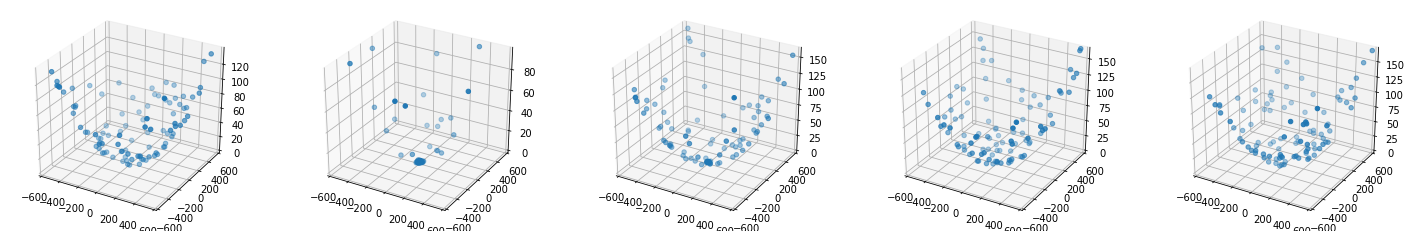

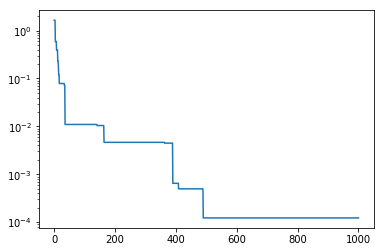

In [249]:
do_simulate(griewank, -600, 600)

最小値: 1.0062350586618966e-05
最小値を取る(x, y): [-6.93884959e-05 -1.00136023e-01]


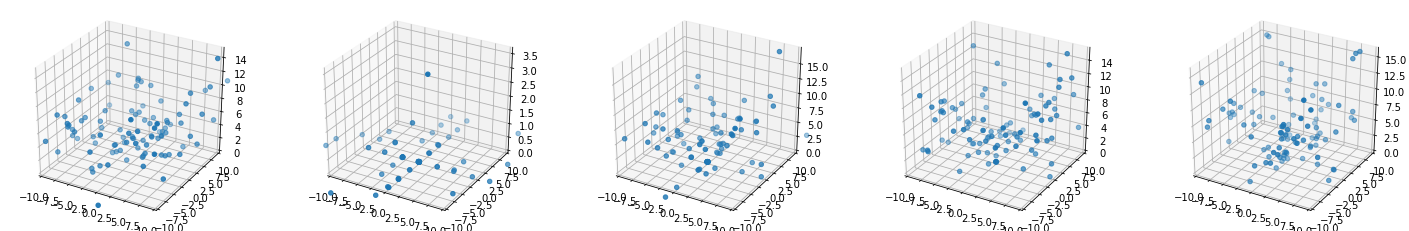

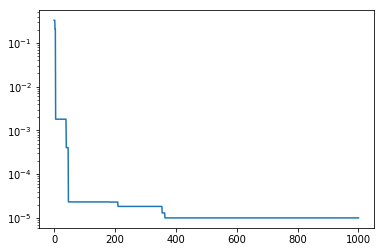

In [250]:
do_simulate(alpine, -10.0, 10.0)

最小値: -156.66465025764262
最小値を取る(x, y): [-2.90412537 -2.90341845]


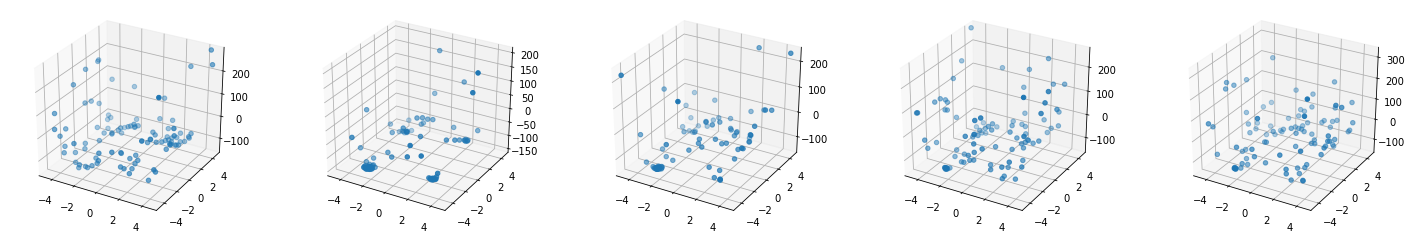

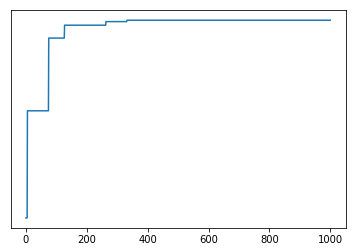

In [251]:
do_simulate(two_fact_minima, -5.0, 5.0)